In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
cancer = pd.read_csv('../assets/datasets/breast-cancer-wisconsin.csv')

In [33]:
cancer.columns = ['id',
                'clump_thickness',
                'cell_size_uniformity',
                'cell_shape_uniformity',
                'marginal_adhesion',
                'single_epithelial_size',
                'bare_nuclei',
                'bland_chromatin',
                'normal_nucleoli',
                'mitoses',
                'class']

In [34]:
cancer = cancer[['clump_thickness',
                'cell_shape_uniformity',
                'marginal_adhesion',
                'single_epithelial_size',
                'bare_nuclei',
                'bland_chromatin',
                'normal_nucleoli',
                'mitoses', 'cell_size_uniformity']]

cancer.head()

cancer['bare_nuclei'][cancer['bare_nuclei']=='?'] = np.NaN

In [42]:
cancer.dropna(inplace=True)

cancer.bare_nuclei = cancer.bare_nuclei.map(int)

In [43]:
# Dependent Variable
target = 'cell_size_uniformity'

# Predictors
predictors  = [
                'clump_thickness',
                'marginal_adhesion',
                'single_epithelial_size',
                'bare_nuclei',
                'bland_chromatin',
                'normal_nucleoli',
                'mitoses']

cancer.ix[:, predictors] = (cancer.ix[:, predictors] - cancer.ix[:, predictors].mean())/(cancer.ix[:, predictors].std())

In [44]:
cancer.head()

,clump_thickness,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,cell_size_uniformity
0,0.197910,4,0.756212,1.692252,1.769880,-0.181831,-0.285663,-0.34843,4
1,-0.510619,1,-0.639557,-0.555734,-0.424771,-0.181831,-0.613096,-0.34843,1
2,0.552175,8,-0.639557,-0.106137,0.123892,-0.181831,1.351499,-0.34843,8
3,-0.156354,1,0.058328,-0.555734,-0.699103,-0.181831,-0.613096,-0.34843,1
4,1.260703,10,1.803038,1.692252,1.769880,2.265715,1.351499,-0.34843,10


In [45]:
cancer_corr = cancer.corr()

cancer_corr

,clump_thickness,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,cell_size_uniformity
clump_thickness,1.000000,0.653968,0.488175,0.523891,0.593524,0.553825,0.534406,0.351100,0.642936
cell_shape_uniformity,0.653968,1.000000,0.685735,0.722313,0.713661,0.735460,0.717784,0.441096,0.907158
marginal_adhesion,0.488175,0.685735,1.000000,0.594340,0.670434,0.668613,0.602893,0.418734,0.706786
single_epithelial_size,0.523891,0.722313,0.594340,1.000000,0.585489,0.618135,0.628743,0.480451,0.753415
bare_nuclei,0.593524,0.713661,0.670434,0.585489,1.000000,0.680689,0.584022,0.339005,0.691487
bland_chromatin,0.553825,0.735460,0.668613,0.618135,0.680689,1.000000,0.665638,0.345957,0.755663
normal_nucleoli,0.534406,0.717784,0.602893,0.628743,0.584022,0.665638,1.000000,0.433602,0.719173
mitoses,0.351100,0.441096,0.418734,0.480451,0.339005,0.345957,0.433602,1.000000,0.460603
cell_size_uniformity,0.642936,0.907158,0.706786,0.753415,0.691487,0.755663,0.719173,0.460603,1.000000


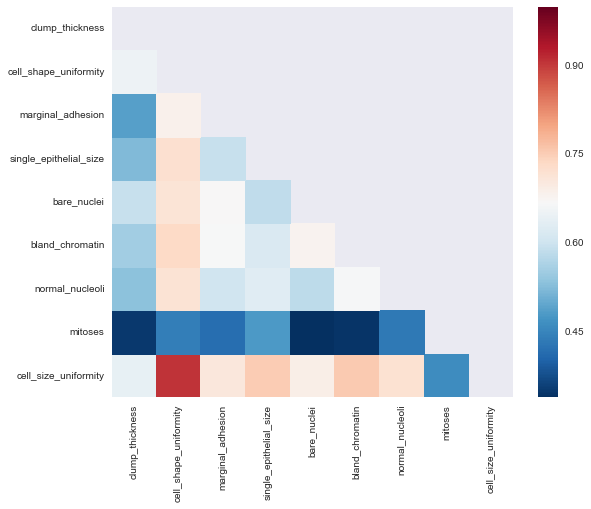

In [48]:
# Change figure size
plt.rcParams['figure.figsize']=(9,7)

# Generate mask for upper triangle
mask = np.zeros_like(cancer_corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn
# Assign plt axis the function return
ax = sns.heatmap(cancer_corr, mask = mask, cmap='RdBu_r')

plt.show()

In [49]:
import patsy



In [53]:
formula_simple = target + ' ~ ' + ' + '.join(predictors) + ' -1'
print formula_simple

cell_size_uniformity ~ clump_thickness + marginal_adhesion + single_epithelial_size + bare_nuclei + bland_chromatin + normal_nucleoli + mitoses -1


In [54]:
Y, X = patsy.dmatrices(formula_simple, data=cancer)

In [55]:
print X.shape

(682, 7)


In [56]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [59]:
ridge_reg = Ridge(alpha=50)

ridge_reg.fit(X,Y)

ridge_reg.coef_

array([[ 0.46100171,  0.46283043,  0.80059973,  0.27296721,  0.65210469,
         0.4898092 ,  0.13183304]])

In [61]:
lasso_reg = Lasso(alpha=50)
lasso_reg.fit(X,Y)
lasso_reg.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.])